<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
plt.style.use('ggplot')


# Lab 5.3.1 
# *Logistic Regression, Support Vector Machines and Naive Bayes*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.
The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called kernels.



### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [3]:
df = pd.read_csv(breast_cancer_csv)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.drop('Unnamed: 32',axis=1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [7]:
df.diagnosis.replace(to_replace='M', value=1,inplace=True) #Malignant -- presence of cancer
df.diagnosis.replace(to_replace='B', value=0,inplace=True) #Benign -- absence of cancer

In [8]:
y = df.diagnosis
X = df.drop(['diagnosis','id'],axis=1)

In [9]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model
- ROC AUC 

In [12]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [13]:
lr.score(X_test,y_test)

0.956140350877193

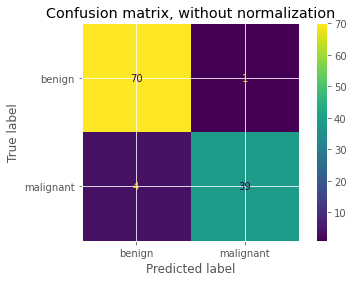

In [14]:
class_names = ['benign', 'malignant']
metrics.plot_confusion_matrix(lr, X_test, y_test, normalize=None, display_labels=class_names)
plt.title("Confusion matrix, without normalization")
plt.show()

In [15]:
# ANSWER
c_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, lr.predict(X_test)),
                        index =['is_healthy', 'is_cancer'],
                        columns = ['predicted_healthy','predicted_cancer'])
TP = c_matrix.iloc[1,1]
TN = c_matrix.iloc[0,0]
FP = c_matrix.iloc[0,1]
FN = c_matrix.iloc[1,0]
recall = TP / float(FN + TP)
precision = TP / float(TP + FP)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))
recall,precision

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



(0.9069767441860465, 0.975)

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [16]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9473684210526315

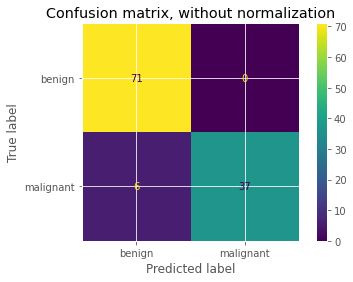

In [17]:
class_names = ['benign', 'malignant']
metrics.plot_confusion_matrix(svc, X_test, y_test, normalize=None, display_labels=class_names)
plt.title("Confusion matrix, without normalization")
plt.show()

In [18]:
c_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, svc.predict(X_test)),
                        index =['is_healthy', 'is_cancer'],
                        columns = ['predicted_healthy','predicted_cancer'])
TP = c_matrix.iloc[1,1]
TN = c_matrix.iloc[0,0]
FP = c_matrix.iloc[0,1]
FN = c_matrix.iloc[1,0]
recall = TP / float(FN + TP)
precision = TP / float(TP + FP)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
recall,precision

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



(0.8604651162790697, 1.0)

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [19]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.9736842105263158

In [20]:
c_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, nb.predict(X_test)),
                        index =['is_healthy', 'is_cancer'],
                        columns = ['predicted_healthy','predicted_cancer'])
TP = c_matrix.iloc[1,1]
TN = c_matrix.iloc[0,0]
FP = c_matrix.iloc[0,1]
FN = c_matrix.iloc[1,0]
recall = TP / float(FN + TP)
precision = TP / float(TP + FP)
y_pred = nb.predict(X_test)
print(classification_report(y_test,y_pred))
recall,precision

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



(0.9302325581395349, 1.0)

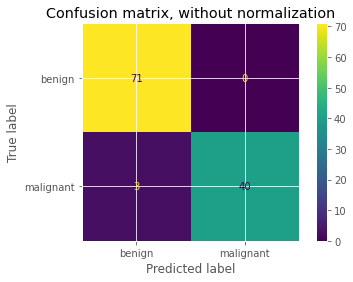

In [21]:
class_names = ['benign', 'malignant']
metrics.plot_confusion_matrix(nb, X_test, y_test, normalize=None, display_labels=class_names)
plt.title("Confusion matrix, without normalization")
plt.show()

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [22]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [24]:
lr_grid = GridSearchCV(lr,lr_params,n_jobs=-1)

In [25]:
lr_grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [26]:
print(lr_grid.best_params_)
lr_grid.score(X_train,y_train)

{'C': 100, 'penalty': 'l2'}


0.9802197802197802

In [27]:
y_pred = lr_grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



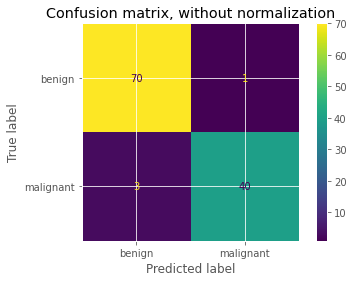

In [28]:
class_names = ['benign', 'malignant']
metrics.plot_confusion_matrix(lr_grid, X_test, y_test, normalize=None, display_labels=class_names)
plt.title("Confusion matrix, without normalization")
plt.show()

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [29]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [30]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [31]:
svc_grid = GridSearchCV(svc,svc_params,n_jobs=-1)

In [32]:
svc_grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [33]:
print(svc_grid.best_params_)
svc_grid.score(X_test,y_test) == svc.score(X_test,y_test)

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


True

In [34]:
nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [35]:
def get_roc_auc(model):
    preds = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)    
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc


def plot_roc_curve(model,colors):
    preds = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)
    plt.plot(fpr, tpr, color=colors, lw = 3,alpha=0.5)

In [36]:
colors = ['red','darkorange','green']
models_grid = [lr_grid,svc_grid,nb]
models = [lr,svc,nb]
model_names = ['Logistis Regression','Support Vector Classifier','Gaussian Naive Bayes']
roc_auc_arr_grid = [get_roc_auc(model) for model in models_grid]
roc_auc_arr = [get_roc_auc(model) for model in models]

In [37]:
roc_auc_arr

[0.9977071732721914, 0.9934490664919751, 0.9983622666229939]

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

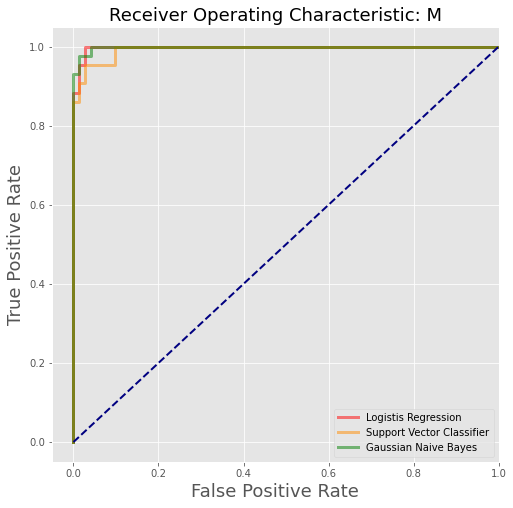

In [38]:
plt.figure(figsize=[8,8])
for model,color in zip(models,colors):
    plot_roc_curve(model,color)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(model_names,loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [39]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [2]:
training_size = np.linspace(0.1,1,10)
training_size

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [3]:
def plot_learning_curve(model,n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=training_size, cv=3,n_jobs=n_jobs)
    mean_train_scores = [np.mean(scores) for scores in train_scores]
    mean_test_scores = [np.mean(scores) for scores in test_scores]
    plt.plot(train_sizes,mean_test_scores,color='red', lw=3)
    plt.plot(train_sizes,mean_train_scores,color='blue',lw=3)

In [41]:
learning_colors = ['red','blue']
legend = ['Test','Train']

Text(0, 0.5, 'Score')

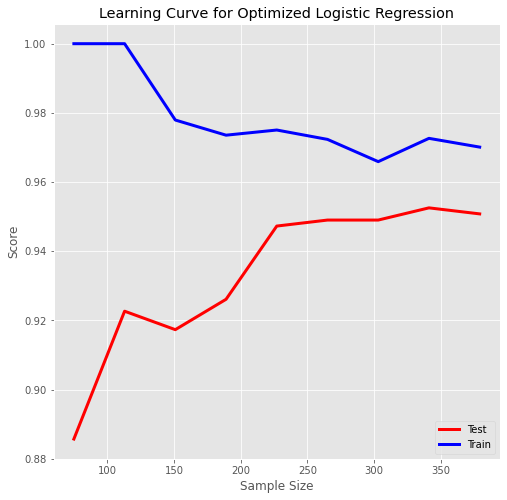

In [43]:
plt.figure(figsize=(8,8))
plot_learning_curve(lr_grid)
plt.legend(legend,loc="lower right")
plt.title('Learning Curve for Optimized Logistic Regression')
plt.xlabel('Sample Size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

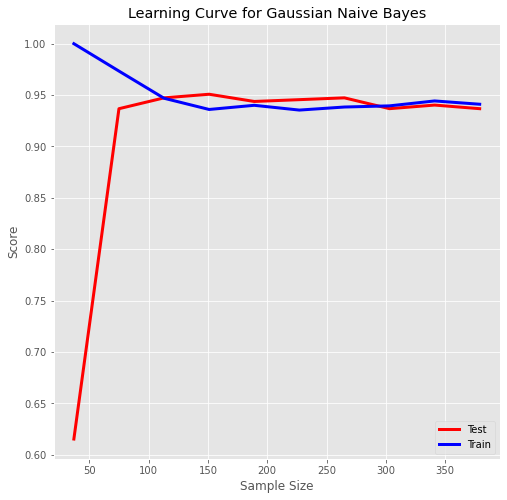

In [45]:
plt.figure(figsize=(8,8))
plot_learning_curve(nb)
plt.legend(legend,loc="lower right")
plt.title('Learning Curve for Gaussian Naive Bayes')
plt.xlabel('Sample Size')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

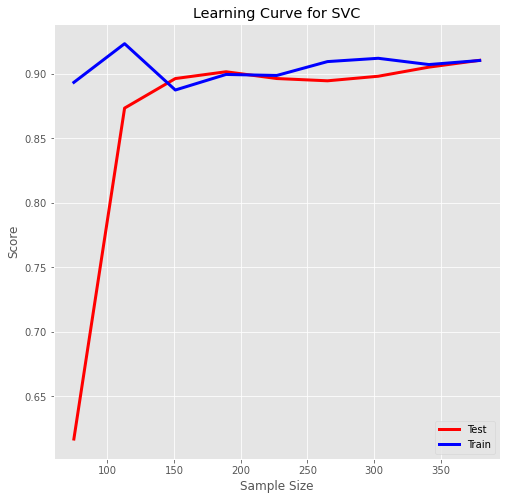

In [47]:
plt.figure(figsize=(8,8))
plot_learning_curve(svc)
plt.legend(legend,loc="lower right")
plt.title('Learning Curve for SVC')
plt.xlabel('Sample Size')
plt.ylabel('Score')

C:\Users\ryan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ryan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\ryan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 765, in fit
    self.best_estimator_.fit(X, y, **fit_params)
  File "C:\Users\ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater th

Text(0, 0.5, 'Score')

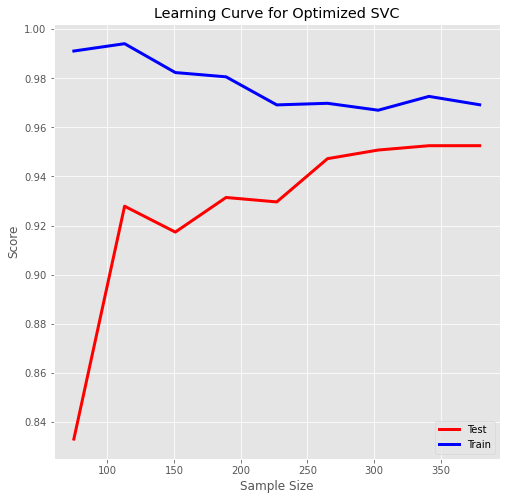

In [51]:
plt.figure(figsize=(8,8))
plot_learning_curve(svc_grid,n_jobs=None)
plt.legend(legend,loc="lower right")
plt.title('Learning Curve for Optimized SVC')
plt.xlabel('Sample Size')
plt.ylabel('Score')

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



